## Solution sketch, lab 9

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as spt

import statsmodels as sms
import statsmodels.formula.api as smf
import seaborn as sns




In [2]:
from cycler import cycler

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams["axes.labelsize"]= 12
plt.rcParams["figure.facecolor"] = "#f2f2f2"
#plt.rcParams['figure.savefig.dpi'] = 100
plt.rcParams['savefig.edgecolor'] = "#f2f2f2"
plt.rcParams['savefig.facecolor'] ="#f2f2f2"
plt.rcParams["figure.figsize"] = [16,10]
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['font.size'] = 14
greens = ['#66c2a4','#41ae76','#238b45','#006d2c','#00441b']
multi =['#66c2a4','#1f78b4','#a6cee3','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f']
plt.rcParams["axes.prop_cycle"] = cycler(color=multi)




## 1: Plotting the outcome vs. a continuous predictor

On page 158-159 in ROS fake data is created in r and the authors demonstrate how to plot a outcome variable against a continuous predictor and a binary treatment indicator ("Plotting the outcome vs. a continuous predictor", figures 11.3-11.5). Redo this (approximately) in python. 

Hint: to generate random draws from [0,1], you can use np.random.randint(0,2,N)

In [3]:
spt.uniform.rvs?

In [11]:
N=100
x = spt.uniform.rvs(0,1,N)

z = np.random.randint(0,2, N)
a = 1
b = 2
theta = 5
sigma= 1
y = a+ b*x + theta*z + np.random.normal(0, sigma, N)
fakeDF = pd.DataFrame({"x":x, "y":y, "z":z})



In [12]:
mod_as1 = smf.glm("y~x+z", data=fakeDF).fit()
mod_as1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                         0.88766
Method:                          IRLS   Log-Likelihood:                -134.41
Date:                Mon, 24 Oct 2022   Deviance:                       86.103
Time:                        10:37:16   Pearson chi2:                     86.1
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9996
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7278      0.220      3.304      0.001       0.296       1.159
x              2.1760      0.338      6.432      0.000       1.513       2.839
z              5.2191      0.189     27.636      0.000       4.849       5.589
==============================================================================
"""

In [13]:
xline = np.linspace(0,1,N)
yline_0 = mod_as1.params[0] + mod_as1.params[1]*xline
yline_1 = mod_as1.params[0] + mod_as1.params[1]*xline + mod_as1.params[2]

(-2.0, 10.0)

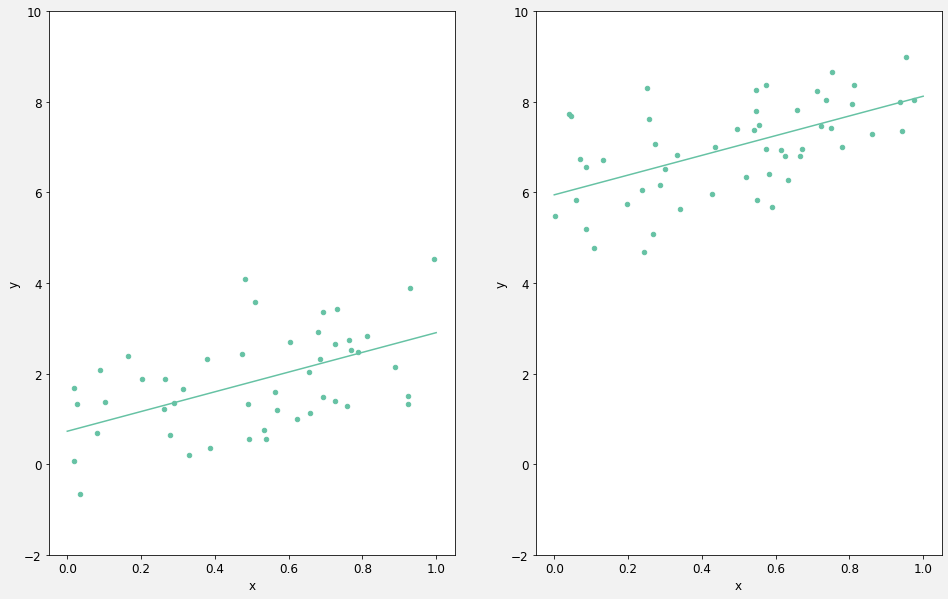

In [14]:
fig, ax = plt.subplots(1,2)
fakeDF.loc[fakeDF.z==0,:].plot.scatter("x", "y", ax=ax[0])
fakeDF.loc[fakeDF.z==1,:].plot.scatter("x", "y", ax=ax[1])
ax[0].plot(xline, yline_0)
ax[1].plot(xline, yline_1)
ax[0].set_ylim(-2,10)
ax[1].set_ylim(-2,10)



In [15]:
fakeDF["fitted"] = mod_as1.predict()
fakeDF["residual"] = mod_as1.resid_response

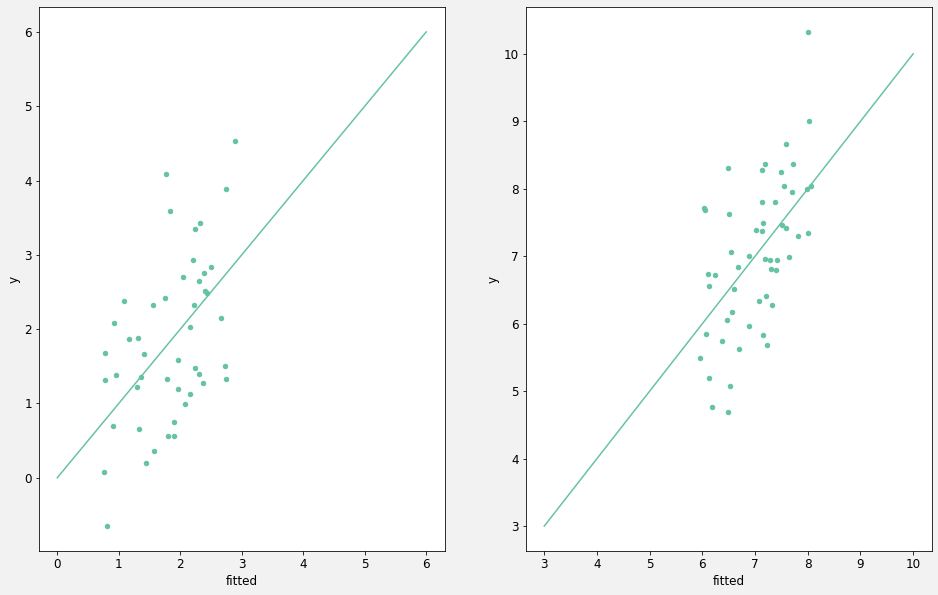

In [16]:
# predicted v outcome

fig, ax = plt.subplots(1,2)
fakeDF.loc[fakeDF.z==0,:].plot.scatter("fitted", "y", ax=ax[0])
fakeDF.loc[fakeDF.z==1,:].plot.scatter("fitted", "y", ax=ax[1])
ax[0].plot(np.linspace(0,6,100), np.linspace(0,6,100))
ax[1].plot(np.linspace(3,10,100), np.linspace(3,10,100))


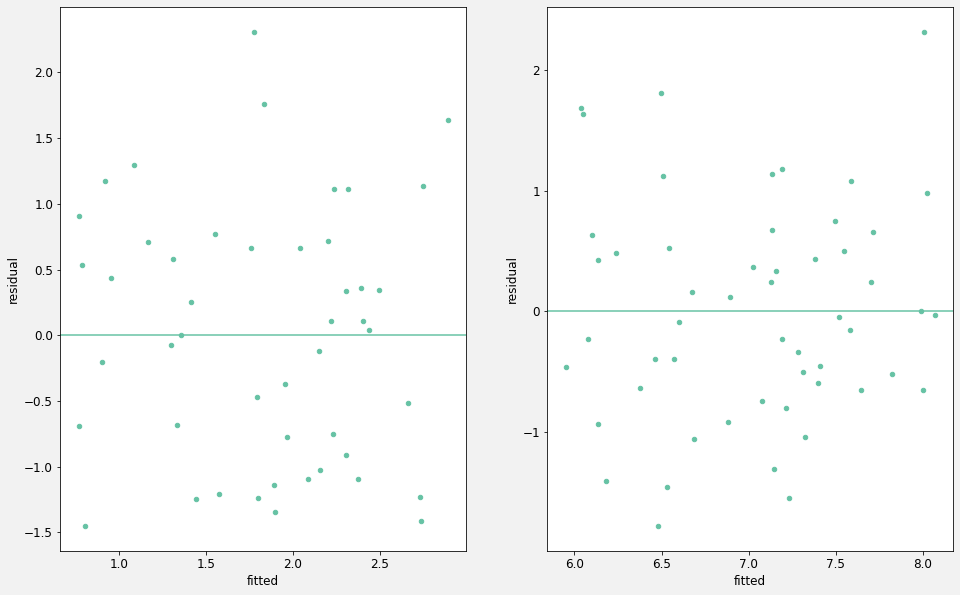

In [17]:
fig, ax = plt.subplots(1,2)
fakeDF.loc[fakeDF.z==0,:].plot.scatter("fitted", "residual", ax=ax[0])
fakeDF.loc[fakeDF.z==1,:].plot.scatter("fitted", "residual", ax=ax[1])
ax[0].axhline(0)
ax[1].axhline(0)

## 2: Posterior Predictive Check

For our model of pv prices, add predictors to our model (for exampe the *china* indicator, and potentially other indicators. 

Run posterior predictive checks using simulation. Display faceted histogram charts and overlayed empirical density charts. 

Instead of plotting histograms/densities of the actual/simulated outcome data (cost_per_kw), plot residuals/simulated residuals (vs fitted) instead. What information does this provide. 

In [103]:
pv = pd.read_csv("data/pv_csi_new.csv", index_col=0)
pv["date"] = pd.to_datetime(pv.date, format="%Y-%m-%d")
pv = pv.sort_values("date")
pv["time_days_m"] = pv.time_days - np.mean(pv.time_days)
pv["time_days_m_sq"] = pv.time_days_m**2

In [104]:
pv.columns

Index(['manufacturer', 'csi_id', 'csi_complete', 'prog_administrator',
       'program', 'csi_cost', 'incentive_design', 'nameplate',
       'incentive_type', 'sector', 'csi_rating', 'cec_ptc_rating',
       'incentive_step', 'incentive_amount', 'incentive_app_status', 'MASH_1A',
       'MASH_1B', 'MASH_2', 'contractor', 'contractor_id', 'csi_3rd_party',
       'city', 'county', 'state', 'zip', 'month', 'year', 'cost_per_kw',
       'year_totals', 'manuf_year_total', 'manuf_market_share',
       'contractor_year_total', 'contractor_market_share', 'county_year_total',
       'lease', 'cost_ex_subsid_per_kw', 'date', 'time_days', 'time_years',
       'time_days_sq', 'time_days_cu', 'time_years_sq', 'time_years_cu',
       'year_num_total', 'manuf_count', 'nationality', 'china', 'time_days_m',
       'time_days_m_sq'],
      dtype='object')

In [106]:
#I will add the variables china, lease, and nameplate, but you could choose alternative variables
pvmod_as2 = smf.glm("cost_per_kw~time_days_m + time_days_m_sq + china + lease + nameplate", data=pv).fit()
pvmod_as2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            cost_per_kw   No. Observations:               104992
Model:                            GLM   Df Residuals:                   104986
Model Family:                Gaussian   Df Model:                            5
Link Function:               identity   Scale:                      2.7531e+06
Method:                          IRLS   Log-Likelihood:            -9.2740e+05
Date:                Mon, 24 Oct 2022   Deviance:                   2.8904e+11
Time:                        11:26:36   Pearson chi2:                 2.89e+11
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4035
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       6301.4300      9.736    647.211      0.000    6282.347    6320.513
time_days_m       -1.8622      0.010   -185.606      0.000      -1.882      -1.843
time_days_m_sq    -0.0003   1.16e-05    -21.573      0.000      -0.000      -0.000
china           -333.5289     13.085    -25.489      0.000    -359.175    -307.883
lease            129.4974     11.871     10.908      0.000     106.230     152.765
nameplate          0.9300      0.194      4.788      0.000       0.549       1.311
==================================================================================
"""

In [110]:
def regSim(regMod): 
    #extract values from regression model
    nmk = regMod.df_resid #n-k
    sigma_hat = np.sqrt(regMod.scale)
    bs_vcov = regMod.cov_params(scale=1)
    bs = regMod.params
    
    #create simulated values
    sigma_sim = sigma_hat*np.sqrt((nmk/np.random.chisquare(nmk,1)))
    V_sim = np.array(bs_vcov) * sigma_sim**2
    bs_sim = np.random.multivariate_normal(bs, V_sim, 1)
    
    return([bs_sim.flatten(), sigma_sim])

(0.0, 20000.0)

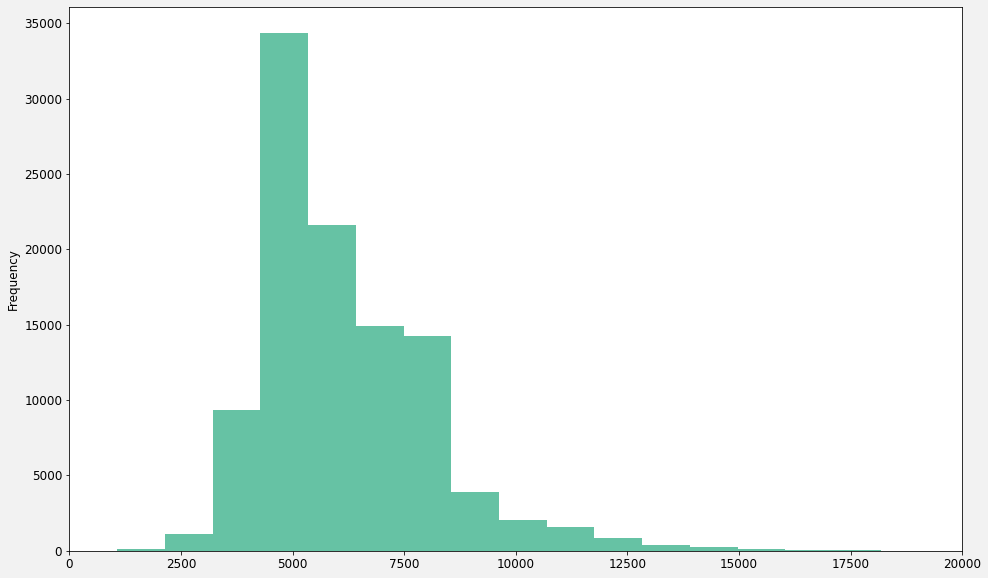

In [85]:
# Here again is the histogram of our original data: 

fix, ax = plt.subplots()
pv.cost_per_kw.plot.hist(bins=100, ax=ax)
ax.set_xlim(0,20000)



In [86]:
# create posterior simulations

nsim = 20
T=3000
nameplate_mean = pv.nameplate.mean() 

x_line = np.linspace(0 , T, T)
x_line_m = x_line - np.mean(x_line)

y_fs = [] #list of fake data


test = regSim(pvmod_as2)

for s in range(nsim):
    param_sim = regSim(pvmod_as2) # generate simulated coefficients
    bs_sim = param_sim[0]
    sigma_sim = param_sim[1]
    y_fs.append(bs_sim[0] + bs_sim[1]*x_line_m + pvmod_as2.params[2]*x_line_m**2 + pvmod_as2.params[5]*nameplate_mean + np.random.normal(0,sigma_sim,T))

#note that china and lease are implicitly set to 0 by not being included


In [87]:
y_fs

[array([ 8195.22621465,  7751.47177077, 10065.23721886, ...,
         -412.26618192,  3300.89194557,   661.41892987]),
 array([8128.87211432, 9174.26763703, 7660.21493313, ..., 1270.68772517,
        4052.84062257, 2095.98102176]),
 array([8276.99825234, 9158.65883454, 9382.40208208, ..., 5008.41034571,
        3528.38273764, 1988.62846961]),
 array([ 8755.42766787, 11821.23147421, 11867.04471582, ...,
         2215.6668078 ,  3323.16553052,   -79.22696233]),
 array([8203.79310816, 9754.03489045, 8846.04293101, ..., 2628.25415678,
        5057.94274297, 3832.49663074]),
 array([ 5706.33061967,  8804.09854311,  7431.23456698, ...,
        -1714.93440924,  1508.50191078,  2263.72542514]),
 array([12170.79271313, 10429.1119624 , 10426.98429   , ...,
         4907.13584282,  4866.24710869,  3729.3706794 ]),
 array([ 9305.96466227, 10102.15519594, 11050.51743946, ...,
         3283.62419572,  6441.46258439,  -452.43252248]),
 array([ 7697.44922405,  9365.51540751, 11473.45526698, ...,
     

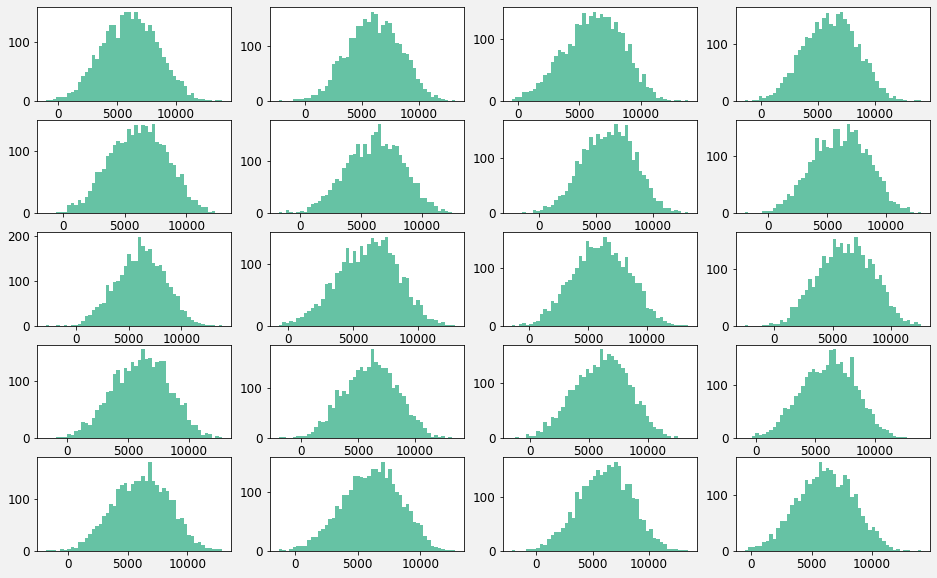

In [88]:
i = 0
fix, ax = plt.subplots(5,4)
for r in range(5):
    for c in range(4):
        ax[r,c].hist(y_fs[i], bins=50)
        i+=1

In [107]:
yf_df = pd.DataFrame(np.transpose(y_fs))
colnames = ["sim" + str(i) for i in range(20)]
yf_df.columns = colnames



In [108]:
yf_df

,sim0,sim1,sim2,sim3,sim4,sim5,sim6,sim7,sim8,sim9,sim10,sim11,sim12,sim13,sim14,sim15,sim16,sim17,sim18,sim19
0,8195.226215,8128.872114,8276.998252,8755.427668,8203.793108,5706.330620,12170.792713,9305.964662,7697.449224,11181.759318,8824.470758,6792.550260,4879.120718,6275.497452,6071.735936,8821.843504,9052.817047,7372.353340,8569.122110,11114.793134
1,7751.471771,9174.267637,9158.658835,11821.231474,9754.034890,8804.098543,10429.111962,10102.155196,9365.515408,7817.099337,8977.265780,7217.203551,6205.475715,8166.241307,6833.320376,6202.081546,10884.953124,10092.847071,4749.540832,9896.491238
2,10065.237219,7660.214933,9382.402082,11867.044716,8846.042931,7431.234567,10426.984290,11050.517439,11473.455267,6780.825103,9285.966323,10586.346277,10949.049619,7722.546725,9635.964809,8046.742915,8658.555704,7190.941405,9457.278094,12120.737790
3,13534.158177,8724.754683,6490.755742,5253.048512,9688.327303,6402.161847,8628.149504,6738.066403,6899.958118,7272.526377,9049.204609,8425.085653,8955.172974,7743.431468,7552.474177,6538.033186,8677.840056,9818.762828,9337.240386,8997.826262
4,7467.281766,9440.278402,7090.580450,9968.018843,8814.792751,9860.313217,7634.760989,7354.815323,8897.281205,10757.827007,5460.431308,8930.774352,8092.502141,6654.268118,4261.608526,9698.826933,6551.377686,10617.353094,6191.606415,7218.366803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2697.174482,2657.535616,3511.906587,6238.592006,590.861832,3841.872516,3399.822232,1416.192129,2711.261905,663.496189,4065.809144,1160.271330,2388.133682,1999.406188,4566.051700,4361.435104,4340.632972,5067.836590,4170.737826,2982.310734
2996,3672.755987,3157.885763,2816.719939,-304.882791,6590.269996,3637.906884,5054.671280,3260.664599,3705.142782,2157.852148,2737.637815,3000.776887,4476.184638,3294.083760,2820.566071,1981.044691,3264.173567,-239.829854,3821.868445,2474.397186
2997,-412.266182,1270.687725,5008.410346,2215.666808,2628.254157,-1714.934409,4907.135843,3283.624196,2279.395887,3842.316362,1327.976977,3140.177669,1894.719792,1739.124488,1300.271494,-52.527848,2344.318956,5700.859310,3353.725258,1702.864933
2998,3300.891946,4052.840623,3528.382738,3323.165531,5057.942743,1508.501911,4866.247109,6441.462584,4269.334938,1251.990675,5745.580973,1367.442612,2789.454930,1962.463983,756.044812,2885.801299,2186.503631,5185.886085,-356.399589,869.984045


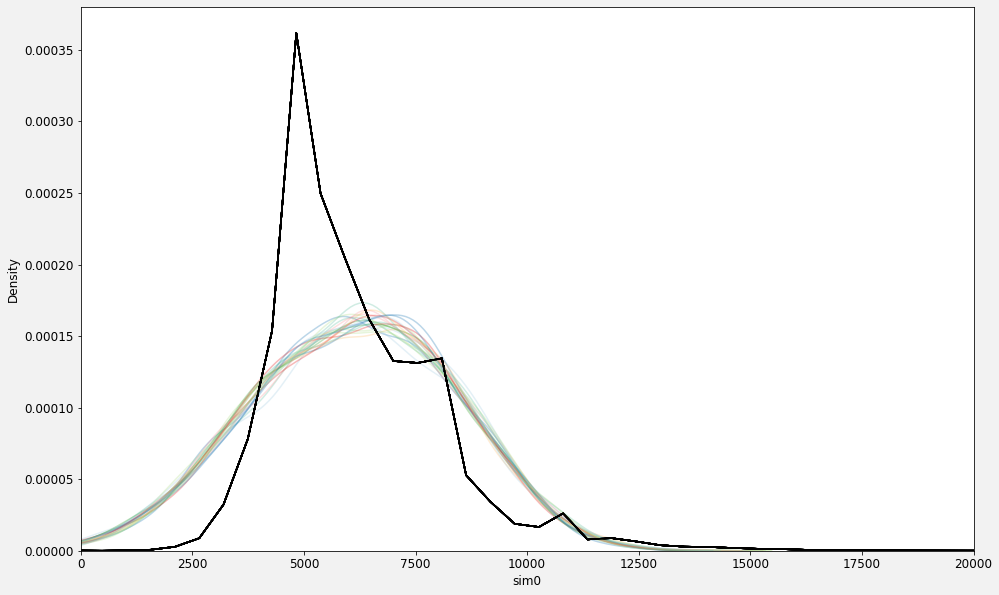

In [109]:
fig, ax=plt.subplots()

for name, values in yf_df.iteritems():
  sns.kdeplot(x=values, ax=ax, alpha=.3)
  sns.kdeplot(x=pv.cost_per_kw, ax=ax, color="black")
  ax.set_xlim(0,20000)

# 3:  External validity

There are several formal methods and tests for testing for external validity--avoiding overfitting, cross-validation, etc. But a more basic test is simply to see how your model behaves outside your (test) dataset.

- Based on the regression model in assignment 2, create a prediction model for the future data. See the statsmodels documentation on [prediction](https://www.statsmodels.org/dev/examples/notebooks/generated/predict.html) on prediction. 

- Create a prediction based on the data for three years ahead of the last data point. (hint, it might make things easier to use untrasformed time variable (*time_days* instead of *time_days_m* in the model.))

- Does the prediction seem reasonable? Do you foresee problems if you were to extrapolate even further into time? 

I use essentially the same model, but I use un-centered *time_days* variable to make the prediction a bit easier and I get rid of missing data (for the china indicator)

In [92]:
any(pv.nameplate.isna())

False

In [93]:
pv = pv.loc[pv.china.notna(),:]

In [94]:
pvmod_as3 = smf.glm("cost_per_kw~time_days + time_days_sq + china + lease + nameplate", data=pv).fit()
pvmod_as3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            cost_per_kw   No. Observations:               104992
Model:                            GLM   Df Residuals:                   104986
Model Family:                Gaussian   Df Model:                            5
Link Function:               identity   Scale:                      2.7531e+06
Method:                          IRLS   Log-Likelihood:            -9.2740e+05
Date:                Mon, 24 Oct 2022   Deviance:                   2.8904e+11
Time:                        11:03:03   Pearson chi2:                 2.89e+11
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4035
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     8851.9054     29.542    299.636      0.000    8794.004    8909.807
time_days       -0.9574      0.039    -24.658      0.000      -1.033      -0.881
time_days_sq    -0.0003   1.16e-05    -21.573      0.000      -0.000      -0.000
china         -333.5289     13.085    -25.489      0.000    -359.175    -307.883
lease          129.4974     11.871     10.908      0.000     106.230     152.765
nameplate        0.9300      0.194      4.788      0.000       0.549       1.311
================================================================================
"""

In [95]:
pv.time_days.describe()

count    104992.000000
mean       1809.390496
std         646.218579
min           0.000000
25%        1366.000000
50%        1914.000000
75%        2313.000000
max        2863.000000
Name: time_days, dtype: float64

In [96]:
time_days = np.arange(2864, 3960, 1)
time_days_sq = time_days**2
china = 0
lease = 0
nameplate = pv.nameplate.mean()

pred_data = pd.DataFrame({"time_days":time_days, "time_days_sq":time_days_sq, "china":china, "lease":lease, "nameplate":nameplate})

In [97]:
pred_data

,time_days,time_days_sq,china,lease,nameplate
0,2864,8202496,0,0,7.03779
1,2865,8208225,0,0,7.03779
2,2866,8213956,0,0,7.03779
3,2867,8219689,0,0,7.03779
4,2868,8225424,0,0,7.03779
...,...,...,...,...,...
1091,3955,15642025,0,0,7.03779
1092,3956,15649936,0,0,7.03779
1093,3957,15657849,0,0,7.03779
1094,3958,15665764,0,0,7.03779


In [98]:
# in sample prediction (fitted values)
pv["pred_cost_per_kw"] = pvmod_as3.predict()

# out of sample prediction
pred_data["pred_cost_per_kw"] = pvmod_as3.predict(pred_data)

In [99]:
pred_data

,time_days,time_days_sq,china,lease,nameplate,pred_cost_per_kw
0,2864,8202496,0,0,7.03779,4065.195859
1,2865,8208225,0,0,7.03779,4062.805717
2,2866,8213956,0,0,7.03779,4060.415075
3,2867,8219689,0,0,7.03779,4058.023933
4,2868,8225424,0,0,7.03779,4055.632291
...,...,...,...,...,...,...
1091,3955,15642025,0,0,7.03779,1160.142066
1092,3956,15649936,0,0,7.03779,1157.206219
1093,3957,15657849,0,0,7.03779,1154.269872
1094,3958,15665764,0,0,7.03779,1151.333025


<AxesSubplot:xlabel='time_days', ylabel='cost_per_kw'>

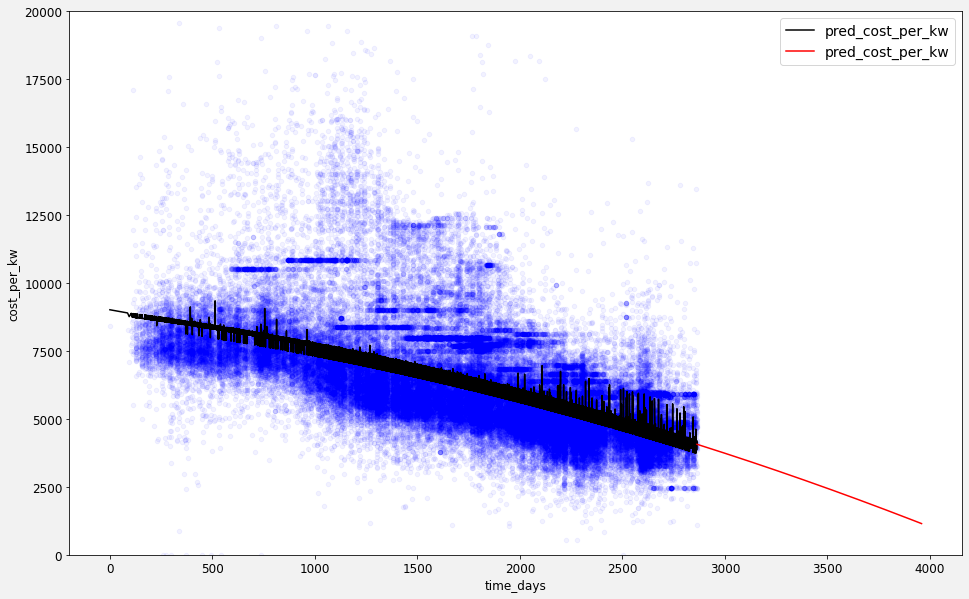

In [100]:
fig, ax = plt.subplots()
pv.plot.scatter("time_days", "cost_per_kw", alpha=.05, color="blue", ax=ax)
ax.set_ylim(0,20000)
pv.plot("time_days", "pred_cost_per_kw", ax=ax, color="black")
pred_data.plot("time_days", "pred_cost_per_kw", ax=ax, color="red")


The model doesn't look too bad forward in time, but we also see that if we continued with this prediction model, we would end up getting prices equal to zero and negative, which is of course absurd. 

If we wanted to avoid this, we could for example log-transform the cost_per_kw to be log, which essentially constrains the prediction to be positive values. 

But in general, making predictions *out of sample* can lead to problems